macros latex
$$ 
\def\R{{\mathbb R}} 
\def\x{{\bf x}}
\def\y{{\bf y}}
\def\a{{\bf a}}
\def\w{{\bf w}}
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn as sk
from sklearn.linear_model import LinearRegression
import sklearn.datasets

# Perceptron : modèle et algorithme

## Classification
Un **problème de classification** est un problème d'apprentissage supervisé où les étiquettes cibles à prédire sont prennent des valeurs binaires. Dans un problème de **classificiation binaire** il n'y a que deux classes et on peut supposer les données de la forme
$${\cal D} = \{ (x^i,y^i) \}_{1 \leq i \leq m}$$
avec $x^i \in \R^d$ et $y^i \in \{-1, +1 \}$  
(on peut parfois aussi considérer les classes $1$ et $0$ au lieu de $1$ et $-1$).

### Exemple en dimension 1  
On cherche à prédire la race d'un chien suivant sa masse.  
Classe -1 : Caniche (12kg en moyenne)
Classe 1 : Dobermann (42 kg en moyenne)

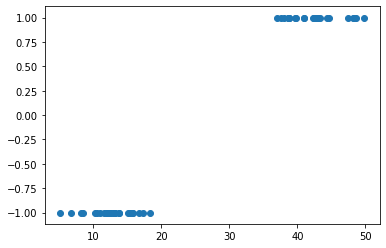

In [2]:
can = np.random.normal(12,3,25)
dob = np.random.normal(42,4,25)
X = np.concatenate((can, dob))
Y = np.array([-1]*25 + [1]*25)
plt.scatter(X,Y)
plt.show()

Essayons de classifier avec la régression linéaire

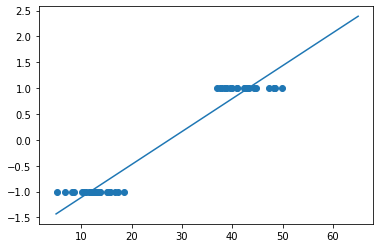

In [3]:
Xr = X.reshape(-1,1)
lin_reg = LinearRegression()
lin_reg.fit(Xr,Y)
Xlin = np.linspace(5,65,200)
plt.plot(Xlin,lin_reg.predict(Xlin.reshape(-1,1)))
plt.scatter(X,Y)
plt.show()

On voit que la regression linéaire en dimension 1 n'est pas du tout adaptée pour séparer les classes. 

### Exemples en dimension 2

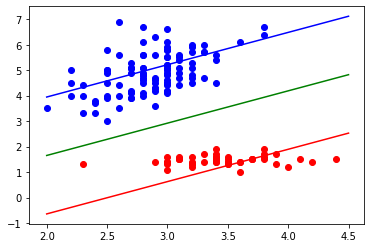

In [21]:
iris = sk.datasets.load_iris()
Xiris = iris.data[ :, 1:3]
Yiris = iris.target
rename = lambda x : 1 if x == 0 else -1
rename = np.vectorize(rename)
Yiris = rename(Yiris)
plt.scatter(Xiris[Yiris==1][:,0],Xiris[Yiris==1][:,1],c='red')
plt.scatter(Xiris[Yiris==-1][:,0],Xiris[Yiris==-1][:,1],c='blue')
lin_reg.fit(Xiris,Yiris)
Xlin = np.linspace(2,4.5,200)
a1,b1 = lin_reg.coef_  
c = lin_reg.intercept_
plt.plot(Xlin, -c/b1 - a1/b1*Xlin , c='green')       #a1 x + b1 y + c = 0 
plt.plot(Xlin, (1-c)/b1 - a1/b1*Xlin , c= 'red')    #a1 x + b1 y + c = 1 
plt.plot(Xlin, (-1-c)/b1 - a1/b1*Xlin, c='blue' )   #a1 x + b1 y + c = -1 
plt.show()

Sur cet exemple cela se passe bien car les deux classes de données sont poids et "taille" dans l'espace sensiblement égales.

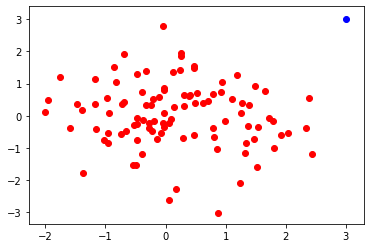

In [22]:
X1 = np.random.multivariate_normal([0,0],[[1,0],[0,1]],100)
X1 = np.concatenate( (X1, np.array([[3,3]])), axis=0 )
Y1 = np.array([1]*100 + [-1])
plt.scatter(X1[Y1==1][:,0],X1[Y1==1][:,1],c='red')
plt.scatter(X1[Y1==-1][:,0],X1[Y1==-1][:,1],c='blue')
plt.show()

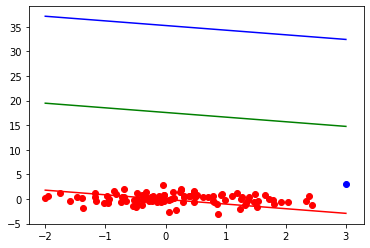

In [23]:
lin_reg.fit(X1,Y1)
Xlin = np.linspace(-2,3,200)
a1,b1 = lin_reg.coef_  
c = lin_reg.intercept_
plt.scatter(X1[Y1==1][:,0],X1[Y1==1][:,1],c='red')
plt.scatter(X1[Y1==-1][:,0],X1[Y1==-1][:,1],c='blue')
plt.plot(Xlin, -c/b1 - a1/b1*Xlin , c='green')       #a1 x + b1 y + c = 0 
plt.plot(Xlin, (1-c)/b1 - a1/b1*Xlin , c= 'red')    #a1 x + b1 y + c = 1 
plt.plot(Xlin, (-1-c)/b1 - a1/b1*Xlin, c='blue' )   #a1 x + b1 y + c = -1
plt.show()

Bilan : la regression linéaire n'est pas pas du tout adaptée à la classification, même pour les données qui sont pourtant *linéairement séparables*.

## Modèle du perceptron, un classificateur linéaire

L'algorithme du Perceptron (Rosenblatt 1957) est un algorithme de *classification linéaire* qui est un modèle élémentaire de neurone.

<img src="images/neurone_bio.png" width=500 alt="neurone biologique">


<img src="images/neurone_bio.png" width=500 alt="neurone biologique">
<img src="images/neurone_art.png" width=500 alt="neurone artificiel">

Le perceptron est un modèle (et un algorithme) pour la classification. On a des données de la forme $(x^i,y^i)$ pour $i$ de 1 à $m$ où $y^i \in \{+1, -1\} $ est l'image de $x^i \in \R^d$ par une fonction inconnue que l'on cherche à approximer.  
Les données appartiennent donc à deux *classes* notées $+1$ et $-1$ et le perceptron doit apprendre à prédire cette classe $y^i$ en fonction de $x^i$.

Le modèle du perceptron, comme la régression linéaire, est *paramétrique*. Les *hypothèses* sont les fonctions
$$h_\w : \R^d \rightarrow \{+1,-1\}$$
  
  où $\w$ est un *vecteur de poids* (paramètres) $\w=(w_1,w_2,\dots,w_d) \in \R^d$ et biais $b \in \R$

  On prédit

  $h(\x) = 1$ si $\sum_{i=1}^d w_i x_i + b \geq 0$
  
  $h(\x) = -1$ si $\sum_{i=1}^d w_i x_i + b < 0$

soit 
  $$h(\x) = \text{signe}(\langle \x,\w \rangle + b) $$




<img src="images/percep1.png" width=500 alt="separation plan par perceptron">

Comme dans le cas de la régression, on augmente la dimension des données avec une coordonnée $x^i_0 = 1$ et on pose $w_0 = b$ de sorte de se ramener à une expression linéaire :
$$h(\x) = \text{signe}(\sum_{i=1}^n w_i x_i + b) = \text{signe}(\sum_{i=0}^n w_i x_i ) $$


On dit que l'échantillon ${\cal D} = \{ (x^i,y^i)_{1 \leq i \leq m}\} $ est *linéairement séparable* s'il existe un hyperplan séparant les deux classes $1$ et $-1$, autrement dit s'il existe $\w$ et $b$ tels que $h_\w(x^i) = y^i$.
Ceci revient à dire aussi qu'il existe un vecteur $\w$ tel que
$$y^i \cdot \langle w, x^i \rangle > 0$$
pour tout $i$.

In [38]:
X0=np.array([[1,-1],[3,2],[1,3],[-1,1],[1,5],[-1,4],[-2,2]])
Y0=np.array([-1,-1,-1,-1,1,1,1])

def visualiser_points(X,Y):
        """représente les points de l'échantillon et leur classe en deux couleurs
        """
        plt.scatter(x=X[Y == 1, 0], y=X[Y == 1, 1], c='green', marker='o', edgecolor='black')
        plt.scatter(x=X[Y == -1, 0], y=X[Y == -1, 1], c='red', marker='o', edgecolor='black')
        plt.show()

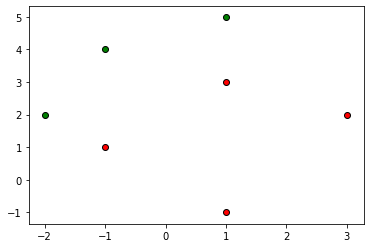

In [16]:
visualiser_points(X0,Y0)

Les points ci-dessus sont clairement linéairement séparables (on peut faire passer strictement une droite entre les points rouges et verts).

## Algorithme du perceptron
Il s'agit d'une règle de mise à jour des poids $\w$ qui va converger vers une solution séparant les classes **dans le cas où les classes sont linéairement séparables**.

*  initialiser $\w = \mathbf{0} = (0,0,\dots,0)$
*  Tant qu'il existe au moins un point $\x^i$, $1 \leq i \leq m$
  qui n'est pas classifié correctement i.e.
  $$ \boxed{y^i \cdot \langle \w, \x^i \rangle < 0}$$ 
  * choisir un tel $\x^i$ mal classifié
  * mettre à jour
  $$\boxed{\w \leftarrow \w + y^i \cdot \x^i}$$



  *Intuition de la mise à jour*  
  Si $\x^i$ est mal classifié, $y^i \neq h(\x^i)$ soit $y^i \cdot \langle
  \x^i,\w \rangle < 0$

  Le nouveau $\w'= \w + y^i \cdot \x^i$ est donc tel que


  \begin{align*}
    y^i \cdot \langle \w',\x^i \rangle  &= y^i \cdot \langle \w  + y^i \cdot \x^i ,\x^i \rangle \\
    &= y^i \cdot \langle \w,\x^i \rangle + (y^i)^2 \cdot \langle \x^i, \x^i \rangle \\
    &> y^i \cdot \langle \w,\x^i  \rangle   
  \end{align*} 

  va donc faire évoluer la classification de $\x^i$ dans le sens souhaité ($\x^i = 0$ est exclus car les $x^i$
  ont $1$ sur la première coordonnée).

  **Théorème** Si l'échantillon $(\x^i,y^i)_{1 \leq i \leq m}$ est linéairement séparable,
    alors en un nombre fini d'étapes l'algorithme du perceptron va se terminer avec un vecteur de poids $\w$
    qui sépare les données.
  
  NB : Le résultat final obtenu dépend de l'ordre dans lequel les points mal
  classifiés   sont considérés.

In [51]:
class Perceptron:
    
    def __init__(self):
        self.w = None #vecteur de poids, w[0] contient le biais
        
    def prediction(self,x):
        """une fois le perceptron entraîné, prédit la valeur sur un point
        ici x est un vecteur non augmenté (on a pas mis de 1 en coordonnée 0)"""
        return 1 if (self.w[0] + np.dot(self.w[1:],x) >=0) else -1
    
    def entrainement(self, X, Y, nb_etapes_max = 10000, rapport = False):
        """X est un jeu de données d-dimensionnelles (np.arrays) 
        (non augmentées de 1 pour le biais)
        Y est l'ensemble des valeurs +1/-1 correspondantes
        Y[i] est la classe de X[i]
        L'algorithme du perceptron va tourner au maximum
        sur le nombre d'étapes données jusqu'à convervence"""
        
        etape = 0 # compteur d'étapes
        en_cours = True
        
        #initialisation des poids à 0
        self.w = np.array([0]*(1+len(X[0])), dtype=float)
            
        while en_cours and etape < nb_etapes_max:
            #recherche du premier point mal classifié
            i = 0
            while i< len(X) and self.prediction(X[i]) == Y[i]:
                #le point est bien classé
                i += 1
            
            if i==len(X):
                #tous les points sont bien classifiés 
                en_cours = False
                break
            else:
                #X[i] est mal classifié
                
                self.w[0] += Y[i]
                self.w[1:] += Y[i]*X[i]
            etape += 1
            
        if rapport:
            if etape < nb_etapes_max:
                print("Nombre d'étapes pour convergence :", etape)
            else:
                print("pas de convergence")

## Exemples
### jeu de données X0 (7 points)

In [24]:
p = Perceptron()
p.entrainement(X0,Y0)
#affichage du vecteur obtenu
print(p.w)

[-8. -4.  3.]


In [41]:
def visualisation_zones(perc,X,Y,label= "", transformation = None):
    """pour un perceptron perc ayant été entraîné,
    représente les points de l'échantillon (X,Y) et les
    zones de décision suivant la valeur actuelle de perc.w """

    #on récupère les coordoonées minimales et maximales présentes
    #dans X sur les axes x1 et x2
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    #on crée une liste de points qui maillent tout le rectangle
    #defini par les valeurs min et max obtenues
    resolution = 0.1
    abscisses = np.arange(x1_min, x1_max, resolution)
    ordonnees = np.arange(x2_min, x2_max, resolution)
    abs_grille, ord_grille = np.meshgrid(abscisses,ordonnees)
    points = np.array([abs_grille.ravel(), ord_grille.ravel()]).T
    if transformation:
        points = transformation(points)
    #valeurs de classification associées à chaque point
    val_points = np.array([perc.prediction(p) for p in points])

    #on place les points X de X dans le graphique
    plt.xlim(abs_grille.min(), abs_grille.max())
    plt.ylim(ord_grille.min(), ord_grille.max())

    cmap = ListedColormap(['tomato','lightgreen'])
    plt.contourf(abs_grille,ord_grille, val_points.reshape(abs_grille.shape), \
                 cmap=cmap, alpha=1)

    plt.scatter(x=X[Y == 1, 0], y=X[Y == 1, 1],
        alpha=1, c='green',
        marker='o', edgecolor='black')

    plt.scatter(x=X[Y == -1, 0], y=X[Y == -1, 1],
        alpha=1, c='red',
        marker='o', edgecolor='black')
    plt.title("vert=1, rouge=-1 "+ label)

    plt.show()

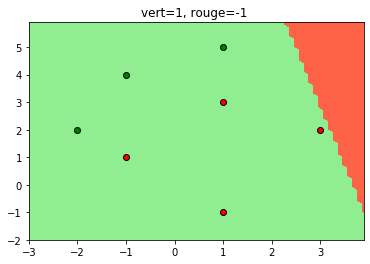

In [42]:
visualisation_zones(p,X0,Y0)

On vérifie bien que le vecteur obtenu sépare linéairement les données.

### jeu de données iris

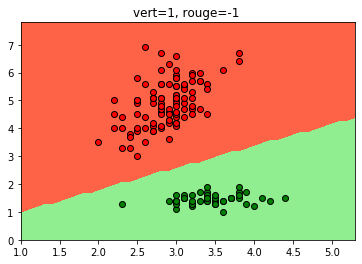

In [43]:
p.entrainement(Xiris,Yiris)
visualisation_zones(p,Xiris,Yiris)

### jeu de données X1 (où la regression linéaire a échoué)

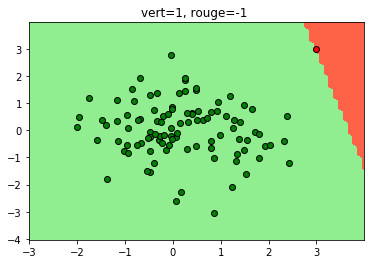

In [44]:
p.entrainement(X1,Y1)
visualisation_zones(p,X1,Y1)

Ici l'algorithme du perceptron est parvenu à classifier les données contrairement à la régression linéaire.

### Exemple en dimension supérieure 

In [85]:
data_wine = sk.datasets.load_wine()
print(dir(data_wine))
print(data_wine['feature_names'])
print(data_wine['target_names'])
Xwine = data_wine.data

# on va utiliser les classes 1 et 2 comme classe 1 et 0 comme classe -1
rename = lambda x : -1 if x == 0 else 1
rename = np.vectorize(rename)
Ywine = rename(data_wine['target'])

['DESCR', 'data', 'feature_names', 'target', 'target_names']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [86]:
print(Xwine[:5,:])
print(Ywine[:5])
print(len(Xwine), len(Ywine))

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
[-1 -1 -1 -1 -1]
178 178


In [104]:
p.entrainement(Xwine, Ywine, nb_etapes_max=500000)


In [105]:
print(sum([ p.prediction(Xwine[i]) != Ywine[i] for i in range(len(Xwine))]))

14


En 500000 étapes on ne parvient pas à séparer les données ici mais le taux d'erreur devient faible (8%). En fait ce jeu de données **est** linéairement séparable. Il pourrait être profitable de mettre les données à la même échelle (scaling) !

In [111]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_X.fit(Xwine)
Xwine_sc = scaler_X.transform(Xwine)

In [117]:
p.entrainement(Xwine_sc, Ywine, nb_etapes_max=50)
print(sum([ p.prediction(Xwine_sc[i]) != Ywine[i] for i in range(len(Xwine))]))

0


On y arrive en 50 étapes !

## Preuve de convergence de l'algorithme
On se place dans le cas où on part du poids initial $w_0 = 0$.
Puisque les données $(x^i,y^i)$ sont linéairement séparables, il existe par définition une direction $w^*$ tel que pour tout $i$ on ait $y^i \cdot \langle w^*, x^i \rangle > 0$, et on pose
$$ \gamma = \min_{1 \leq i \leq m} y^i \cdot \langle w^*, x^i \rangle,$$
on a alors $\gamma >0$.

D'autre part les $x^i$ étant en nombre fini il existe $R > 0$ tel que 
$$\forall i, \|x^i\| \leq R.$$
(on considère la norme 2 pendant cette preuve).

Rappel : la règle de mise à jour de $w$ est 
$$w \leftarrow w + y^i x^i$$
où $x^i$ vérifie $y^i \cdot \langle w, x^i \rangle < 0$ (mal classifié). 

Soit $w_t$ le vecteur de poids obtenu à l'étape $t$. D'après la règle ci-dessus
$$
\begin{align*}
    \|w_{t+1}\|^2 &= \langle w_{t+1}, w_{t+1} \rangle \\
                  &=  \langle w_t, w_t \rangle +  2 y^i \langle w_t, x^i \rangle + \langle y^i x^i, y^i x^i\rangle  \\
                  &\leq \| w_t \|^2 + R^2
\end{align*}
  $$
 donc par récurrence et comme $w_0 = 0$ on obtient
 $$ \| w_t \|^2 \leq t R^2  $$

D'un autre côté on a
$$
\begin{align*}
    \langle w^*, w_{t+1} \rangle &= \langle w^*, w_t \rangle + y^i \langle w^*, x^i \rangle \\
                                 &\geq  \langle w^*, w_t \rangle + \gamma \\
 \end{align*}
  $$
  d'où par récurrence 
  $$ \langle w^*, w_t \rangle \geq t \gamma $$
  et comme $\langle w^*, w_{t+1} \rangle \leq \|w^*\| \|w_t\| = \|w_t\|$
  on en déduit
  \begin{equation}
    \| w_t \| \geq t \gamma
  \end{equation}


Des deux inéalités sur $\|w_t\|$ on déduit 
$$ t^2 \gamma^2 \leq t R^2 $$
d'où
$$t \leq \frac{\R^2}{\gamma^2}$$
On a donc convergence en au plus ce nombre d'étape. Il apparait que l'algorithme prend d'autant plus de temps que les données sont grandes (R grand) ou sont peu séparables linéairement ($\gamma$ petit).

## Données non linéairement séparables
### le "pocket algorithm"

Si les données ne sont pas séparables, on peut chercher un vecteur $\w$ qui minimise le taux d'erreur
$$TE(\w) = \frac{| h_\w (x^i) \neq y^i, 1 \leq i \leq m |}{m}$$

In [31]:
def taux_erreur(p, X_test, Y_test):
    """renvoie le taux entre 0 et 1 d'erreurs du perceptron (déja entrainé)
    sur (X_test,Y_test)"""

    err = 0
    for i in range(len(X_test)):
        if p.prediction(X_test[i]) != Y_test[i]:
            err += 1
    return float(err)/len(X_test)  

In [34]:
#Génération de 200 points situés de part et d'autre de la parabole y=-2x^2 -x + 3

def echantillon_rect_uniforme_2D(x1_min, x1_max, x2_min, x2_max, taille_echantillon):
    """renvoie un echantillon iid uniformément dans le rectangle donné"""
    X = np.random.random_sample((taille_echantillon,2))
    X[:,0] = X[:,0]*(x1_max-x1_min) + x1_min
    X[:,1] = X[:,1]*(x2_max-x2_min) + x2_min
    return X


Xpar = echantillon_rect_uniforme_2D(-5,5,-5,5,200)
Ypar = np.array([1 if -2*(Xpar[i,0])**2 - Xpar[i,1] + 3 >=0 else -1 for i in range(len(Xpar))])

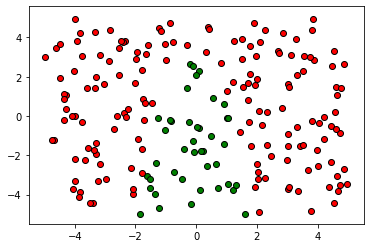

In [39]:
visualiser_points(Xpar, Ypar)

In [54]:
#on vérifie que l'algo du perceptron ne converge pas
p.entrainement(Xpar,Ypar, rapport=True)

pas de convergence


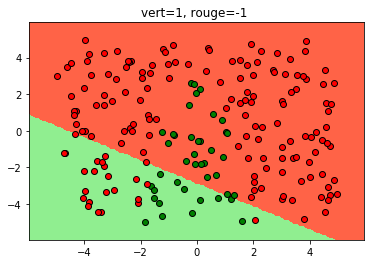

In [55]:
visualisation_zones(p,Xpar,Ypar)

In [56]:
taux_erreur(p,Xpar,Ypar)

0.245

Soit 24.5% des données mal classifiées.

Le **"pocket algorithm"** : on garde simplement la trace au cours de l'algorithme du perceptron du vecteur de poids $\w$ qui a donnée le meilleur taux d'erreur !

In [119]:
#fonction qu'on va ajouter au preceptron en méthode 
def f(p, X, Y, nb_etapes = 1000):
        """idem que entrainement mais garde en mémoire les diffents
        w obtenus et garde au final celui qui a le taux d'erreur
        le plus bas.
        NB : pour illustration on garde tous les w successifs
        mais on pourrait ne garder que le meilleur pour être plus efficace"""
                
        etape = 0 # compteur d'étapes
        en_cours = True
        

        #initialisation des poids à 0
        p.w = np.array([0]*(1+len(X[0])),dtype=float)
        Ws = [np.copy(p.w)]  #va stocker tous les w successifs
        erreurs = [taux_erreur(p,X, Y)]
                    
        while en_cours and etape < nb_etapes:
            #recherche du premier point mal classifié
            i = 0
            while i< len(X) and p.prediction(X[i]) == Y[i]:
                #le point est bien classé
                i += 1
            
            if i==len(X):
                #tous les points sont bien classifiés 
                en_cours = False
                break
            else:
                #X[i] est mal classifié
                
                p.w[0] += Y[i]
                p.w[1:] += Y[i]*X[i]
                
                Ws.append(np.copy(p.w))  #va stocker tous les w successifs
                erreurs.append(taux_erreur(p,X, Y))
            etape += 1
        #on cherche le meilleur et on le met en w courant du perceptron
        i = np.array(erreurs).argmin()
        p.w = Ws[i]
        return Ws

#on ajoute la fonction comme nouvelle méthode au perceptron
Perceptron.meilleur_entrainement = f

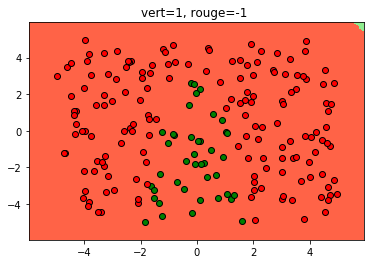

In [69]:
p = Perceptron()
W = p.meilleur_entrainement(Xpar, Ypar, nb_etapes = 500)
taux_erreur(p,Xpar,Ypar)  #qui est plus faible maintenant en principe !
visualisation_zones(p,Xpar,Ypar)

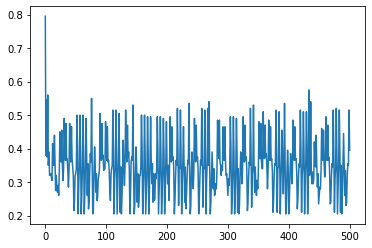

In [73]:
# liste des taux d'erreurs successifs
E = []
for w in W:
    p.w = w
    E.append(taux_erreur(p,Xpar,Ypar))
plt.plot(E)
plt.show()

Comme on le voit dans le cas non linéairement séparable on ne peut pas dire que l'algorithme s'approche d'une solution meilleure car il continue à osciller.

### Augmentation de la dimension
Comme pour la regression linéaire, on peut procéder à une augmentation de la dimension des données en ajoutant des caractéristiques quadratiques, cubiques, etc. et entraîner un perceptron en plus haute dimension.

In [127]:
def quadratiser_donnees_2d(X):
    c1 = (X[:,0]**2).reshape(len(X),1)
    c2 = (X[:,1]**2).reshape(len(X),1)
    c3 = (X[:,0] * X[:,1]).reshape(len(X),1)
    return np.concatenate((X,c1,c2,c3),axis=1)

In [130]:
X = np.array([[1,2],[3,4]])
quadratiser_donnees_2d(X)

array([[ 1,  2,  1,  4,  2],
       [ 3,  4,  9, 16, 12]])

In [134]:
Xpar_a = quadratiser_donnees_2d(Xpar)
p = Perceptron()
p.entrainement(Xpar_a, Ypar)
taux_erreur(p, Xpar_a, Ypar)

0.0

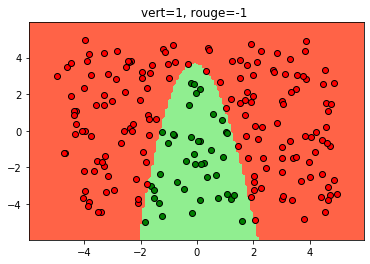

In [136]:
visualisation_zones(p, Xpar, Ypar, transformation = quadratiser_donnees_2d)